In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.style.use('seaborn-notebook')

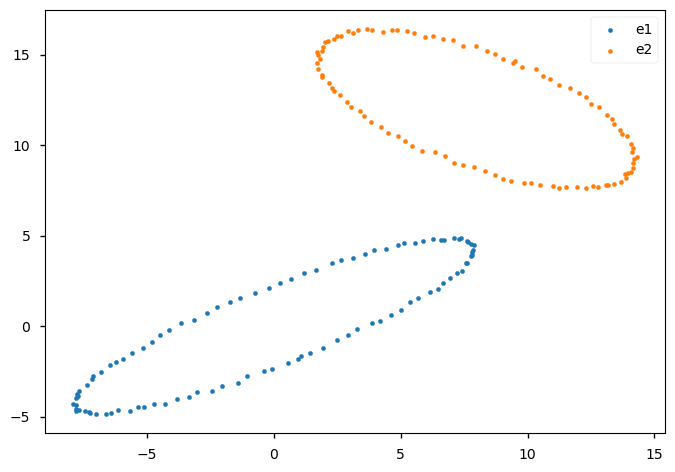

In [2]:
pi = float(np.pi)
N = 100
trange = np.linspace(0, 2*pi, N)
X1 = 2 * np.cos(trange)
Y1 = 9 * np.sin(trange)
X2 = 3 * np.cos(trange)
Y2 = 7 * np.sin(trange)
XY1 = np.c_[X1,Y1]
XY2 = np.c_[X2,Y2]

C1 = np.array([[np.cos(pi/3), -np.sin(pi/3)],[np.sin(pi/3), np.cos(pi/3)]])
XY1_C_orig = XY1 @ C1
C2 = np.array([[np.cos(-pi/3), -np.sin(-pi/3)],[np.sin(-pi/3), np.cos(-pi/3)]])
XY2_C_orig = XY2 @ C2

XY1_o1 = XY1_C_orig + (2*np.random.random(size=(N,2))-1) * 0.1
XY2_o1 = XY2_C_orig + (2*np.random.random(size=(N,2))-1) * 0.1

XY2_o1[:,0] += 8
XY2_o1[:,1] += 12

Z = np.zeros(N, 'd')

plt.scatter(XY1_o1[:,0], XY1_o1[:,1], label='e1', s=9)
plt.scatter(XY2_o1[:,0], XY2_o1[:,1], label='e2', s=9)
plt.legend()
plt.show()

In [3]:
import mlgrad
import mlgrad.model as ml_model
import mlgrad.risk as ml_risk
import mlgrad.loss as ml_loss
import mlgrad.weights as ml_weights
import mlgrad.func as ml_func
import mlgrad.func2 as ml_func2
import mlgrad.af as ml_af

In [35]:
layer = ml_model.GeneralModelLayer(2)
mod1 = ml_model.EllipticModel(2)
mod2 = ml_model.EllipticModel(2)
layer.append(mod1)
layer.append(mod2)
nn = ml_model.FFNetworkModel()
nn.add(layer)

nn.allocate()
print(np.asarray(nn.param))
nn.init_param()
print(np.asarray(nn.param))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0.]
[0.67980559 0.55852256]
[0. 0. 0.]
[0. 0. 0.]
[1. 0. 1.]
[0. 0.]
[0.05830959 0.07711113]
[0. 0. 0.]
[0. 0. 0.]
[1. 0. 1.]
[0.67980559 0.55852256 1.         0.         1.         0.05830959
 0.07711113 1.         0.         1.        ]


In [36]:
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.Absolute()), 2, a=22)
risk = ml_risk.ERisk2(XY1_o1, Z, nn, minloss)

IndexError: Index out of bounds (axis 0)

Exception ignored in: 'mlgrad.risk.ERisk2._evaluate'
Traceback (most recent call last):
  File "/home/intellimath/.local/lib/python3.10/site-packages/mlgrad-0.5-py3.10-linux-x86_64.egg/mlgrad/__init__.py", line 126, in erm_fg
    alg.fit(warm=(i>0))
IndexError: Index out of bounds (axis 0)


IndexError: Index out of bounds (axis 0)

Exception ignored in: 'mlgrad.risk.ERisk2._gradient'
Traceback (most recent call last):
  File "/home/intellimath/.local/lib/python3.10/site-packages/mlgrad-0.5-py3.10-linux-x86_64.egg/mlgrad/__init__.py", line 126, in erm_fg
    alg.fit(warm=(i>0))
IndexError: Index out of bounds (axis 0)


IndexError: Index out of bounds (axis 0)

Exception ignored in: 'mlgrad.risk.ERisk2._evaluate'
Traceback (most recent call last):
  File "/home/intellimath/.local/lib/python3.10/site-packages/mlgrad-0.5-py3.10-linux-x86_64.egg/mlgrad/__init__.py", line 126, in erm_fg
    alg.fit(warm=(i>0))
IndexError: Index out of bounds (axis 0)


0
[0.67980559 0.55852256 1.         0.         1.         0.05830959
 0.07711113 1.         0.         1.        ]
[0.67980559 0.55852256] [1. 0. 1.]
[0.05830959 0.07711113] [1. 0. 1.]


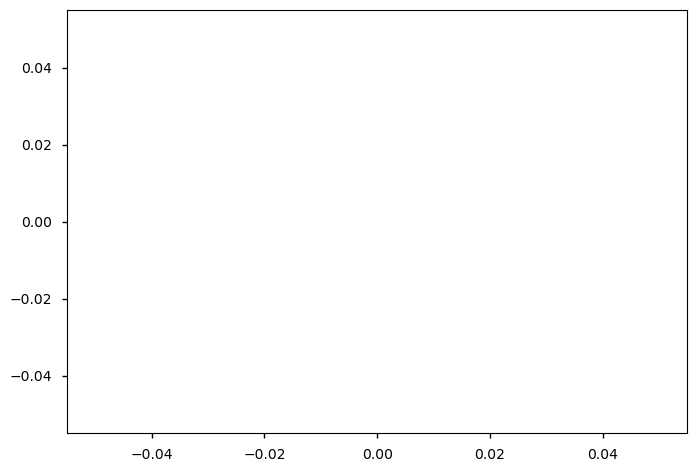

In [37]:
alg = mlgrad.erm_fg(risk, n_restart=5, h=0.001)
print(alg.K)
print(np.asarray(nn.param))
print(np.asarray(mod1.c), np.asarray(mod1.S))
print(np.asarray(mod2.c), np.asarray(mod2.S))

plt.plot(alg.lvals)
plt.show()

In [38]:
mc = ml_model.ModelComposition(ml_func2.SoftMin(p=22))
mc.append(mod1)
mc.append(mod2)

In [39]:
xr1 = np.linspace(-10,20,100)
xr2 = np.linspace(-10,20,100)
XX, YY = np.meshgrid(xr1, xr2)
XY = np.c_[XX.ravel(), YY.ravel()]
Z = mc.evaluate_all(XY)
ZZ = Z.reshape(XX.shape)

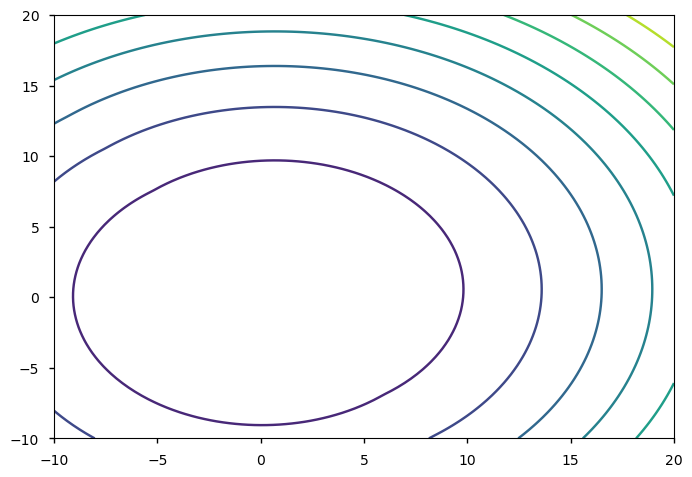

In [40]:
levels = np.linspace(Z.min(), Z.max(), 10)
plt.contour(ZZ, levels=levels, extent=(-10,20,-10,20))
plt.show()